In [ ]:
import requests

# URL of the dataset
url = "https://scontent.xx.fbcdn.net/m1/v/t6/An_YmP5OIPXun-vu3hkckAZZ2s4lPYoVkiyvCcWiVY21mu1Ng5_1HeCa2CWiSTsskj8HQ8bN013HxNpYDdSC_7jWQq_svcg.tar?ccb=10-5&oh=00_AfDW2Zb7AErMFF1DHqBBj9dlDFD2PE4ZPdXaa8KbsRdmoQ&oe=65C1E068&_nc_sid=0fdd51"

# Make a GET request to download the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the file
    with open('SA1B.tar', 'wb') as file:
        file.write(response.content)
    print("File downloaded and saved as 'SA1B.tar'")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


In [ ]:
import tarfile
import os

# Path to the tar file
tar_path = 'SA1B.tar'

# Check if the tar file exists
if os.path.exists(tar_path):
    # Open the tar file
    with tarfile.open(tar_path, "r") as tar:
        # Extract all the contents into a directory
        tar.extractall(path='SA1B')
    print("File extracted successfully to 'SA1B' directory")
else:
    print("File 'SA1B.tar' does not exist.")


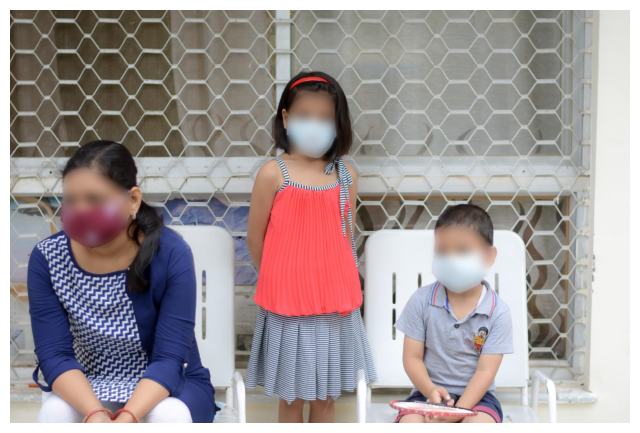

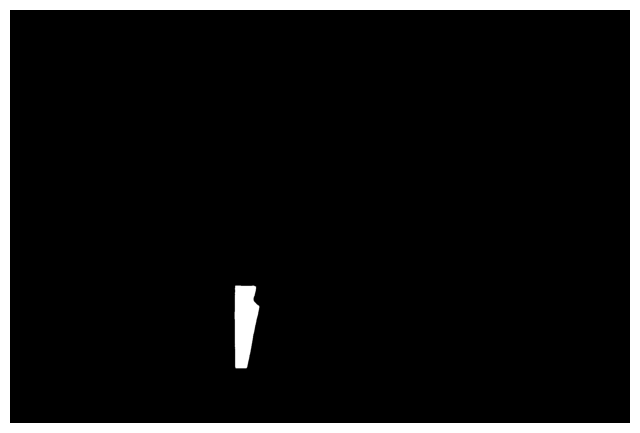

In [2]:
import os
import random
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask
from PIL import Image
import json

# Set the path to your dataset directory
dataset_directory = "SA1B"

# Create a list of image and mask file pairs
image_mask_pairs = []
for filename in os.listdir(dataset_directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(dataset_directory, filename)
        mask_filename = filename.replace(".jpg", ".json")
        mask_path = os.path.join(dataset_directory, mask_filename)
        if os.path.exists(mask_path):
            image_mask_pairs.append((image_path, mask_path))

# Choose a random pair from the list
random_pair = random.choice(image_mask_pairs)
image_path, mask_path = random_pair

# Load and display the image
image = Image.open(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Load and display the mask
with open(mask_path, 'r') as json_file:
    mask_data = json.load(json_file)

# Convert RLE mask to binary mask
rle_mask = mask_data['annotations'][0]['segmentation']
binary_mask = coco_mask.decode(rle_mask)

# Display the binary mask
plt.figure(figsize=(8, 8))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.show()


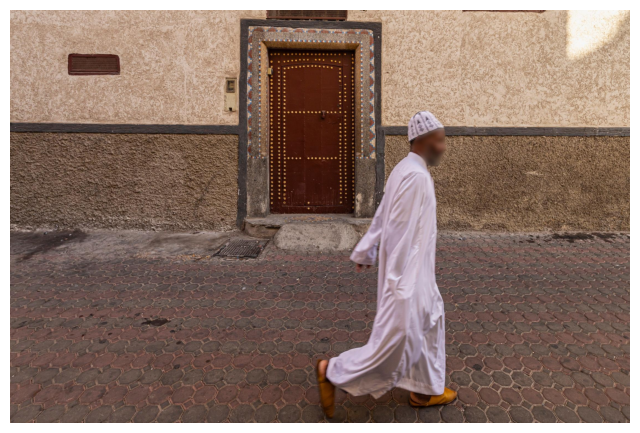

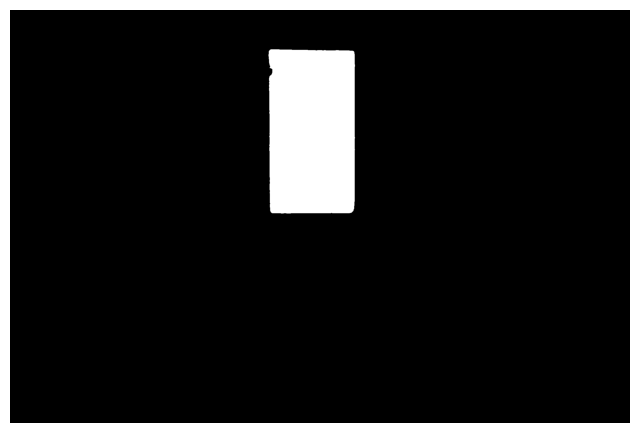

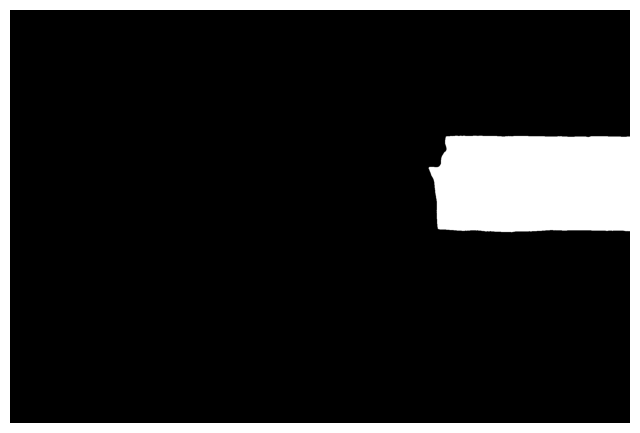

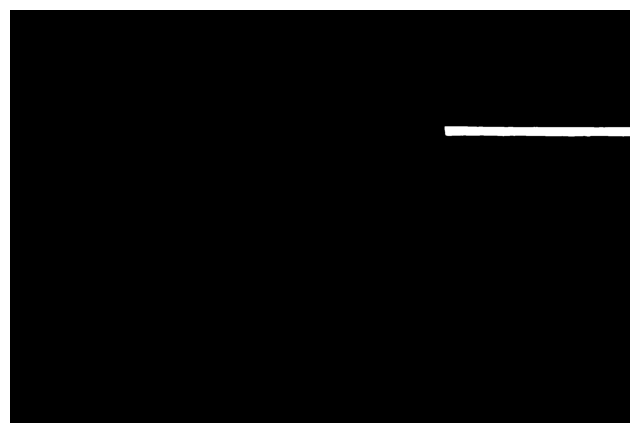

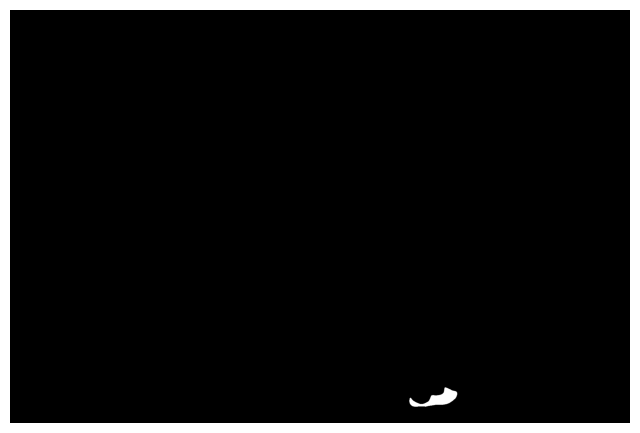

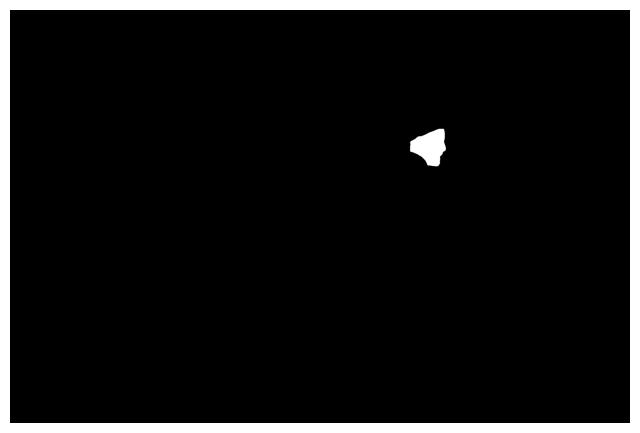

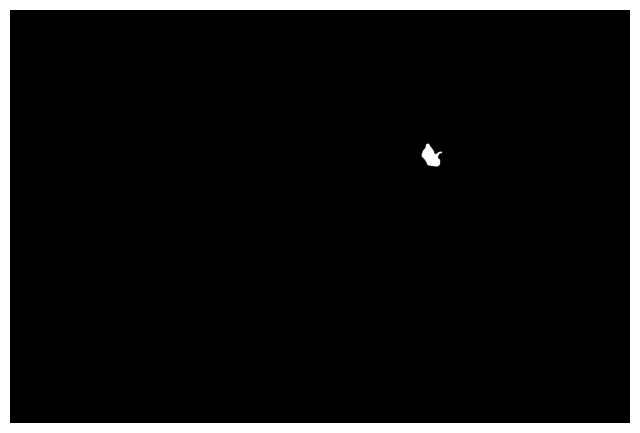

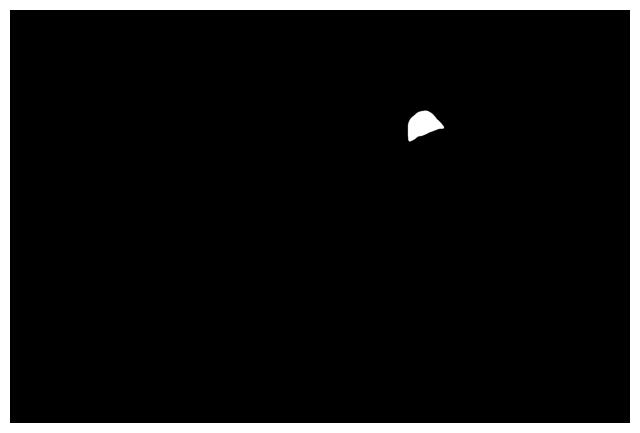

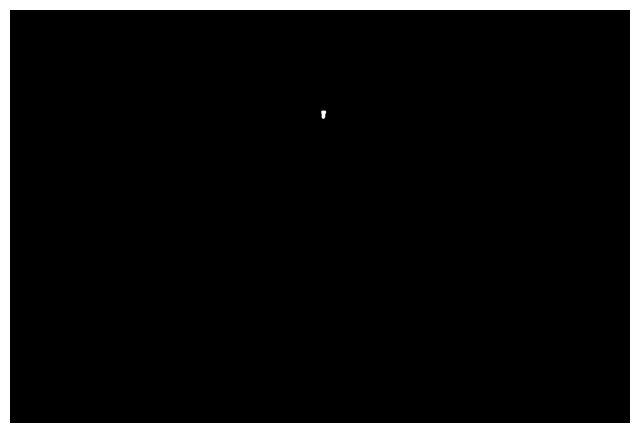

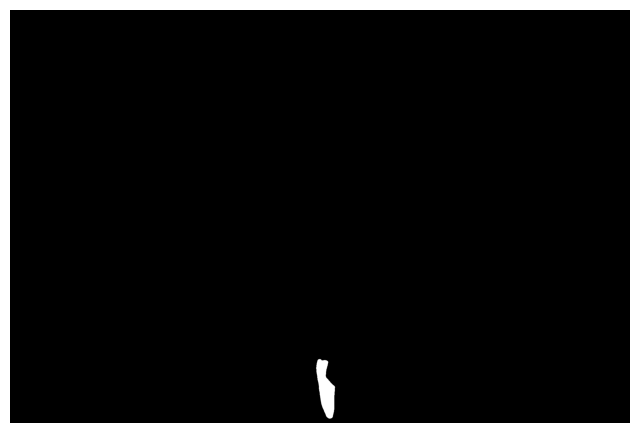

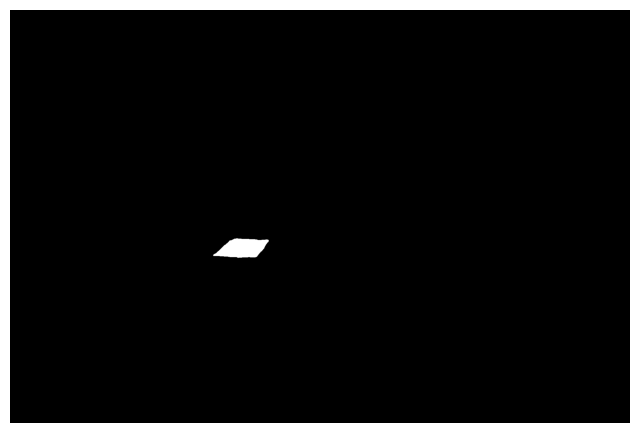

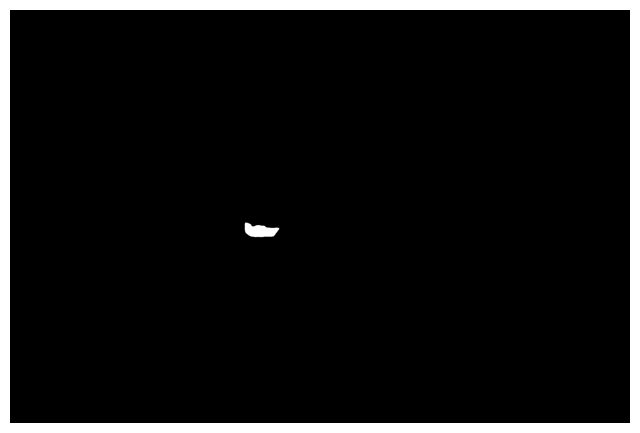

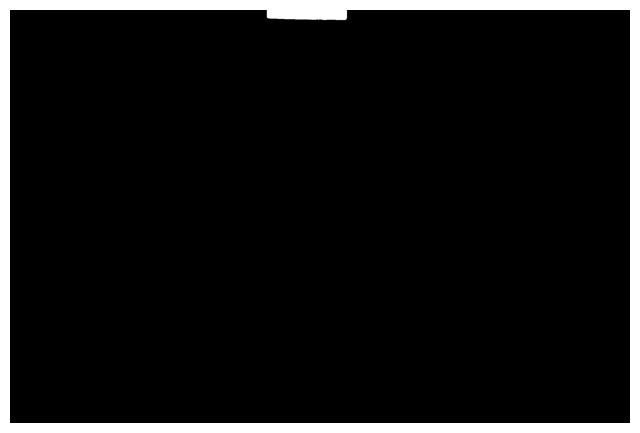

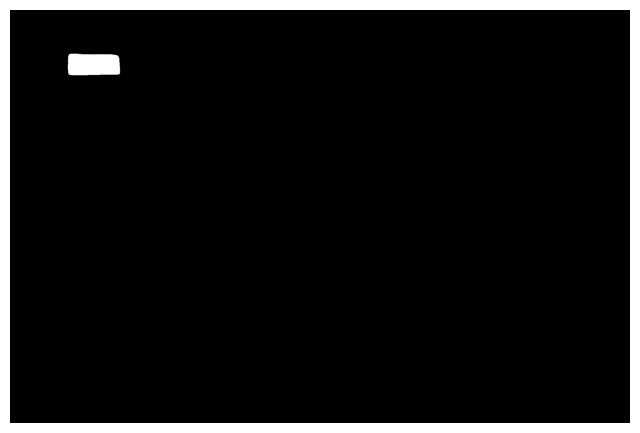

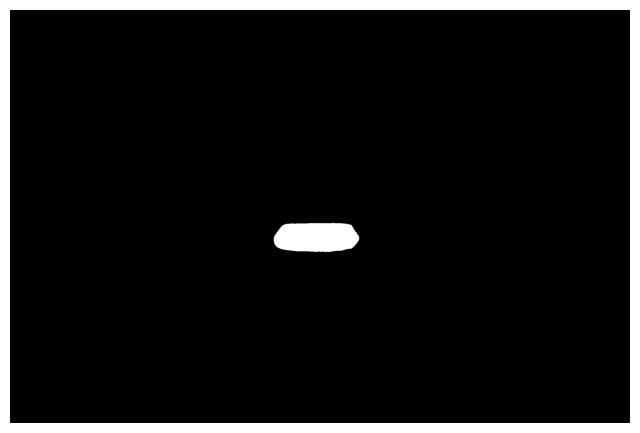

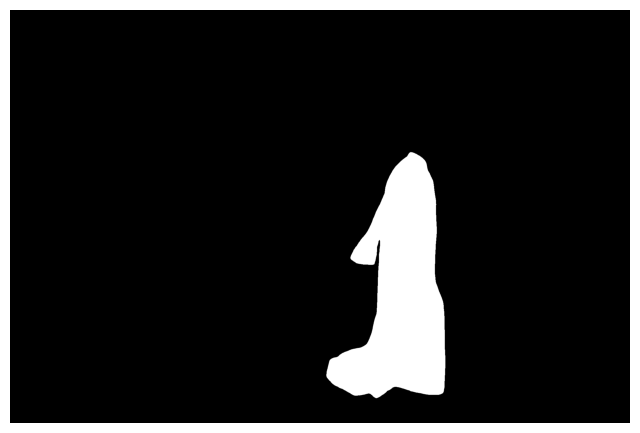

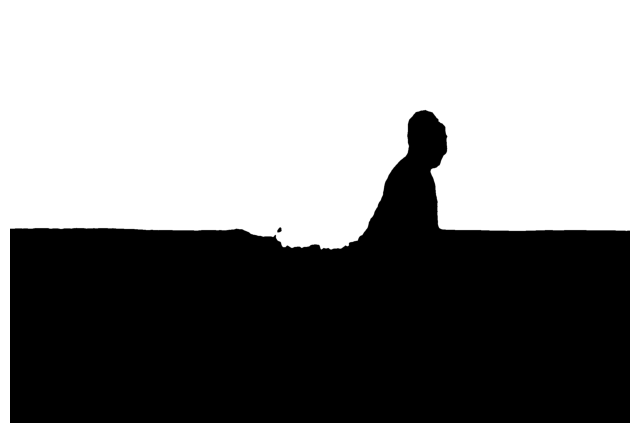

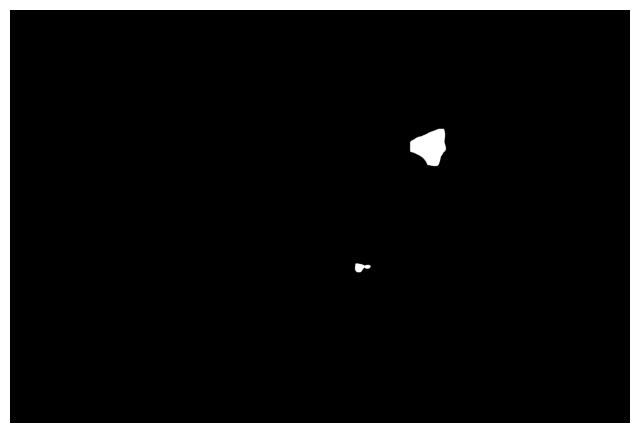

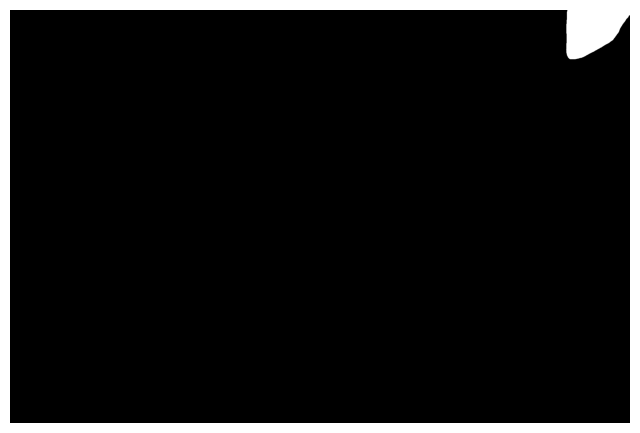

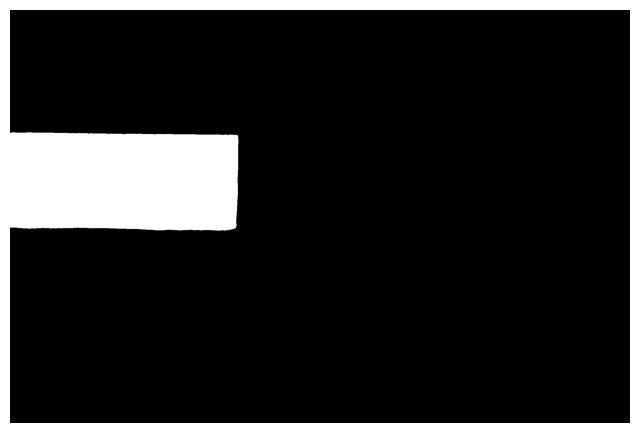

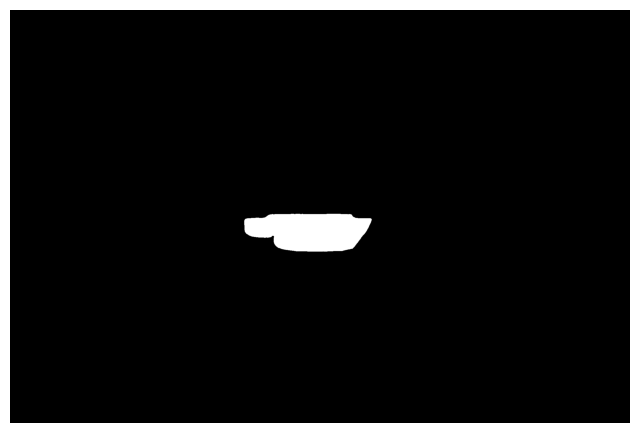

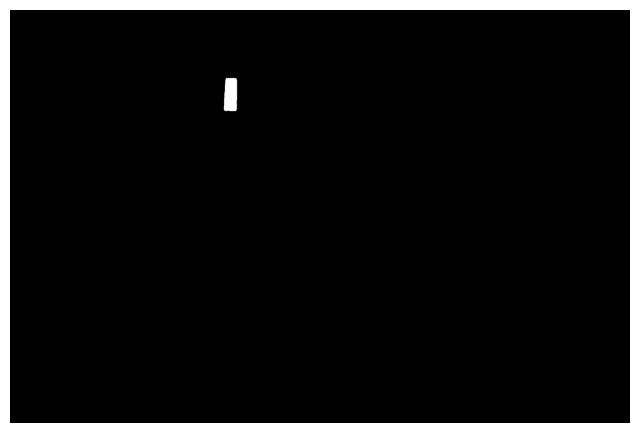

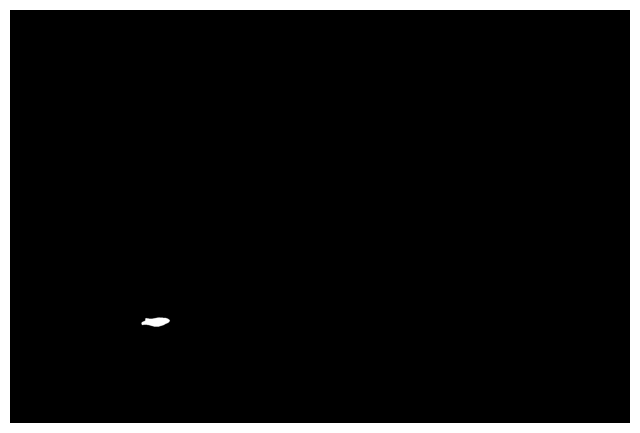

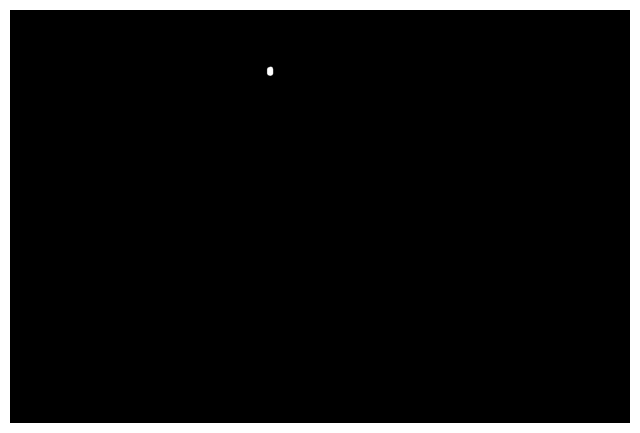

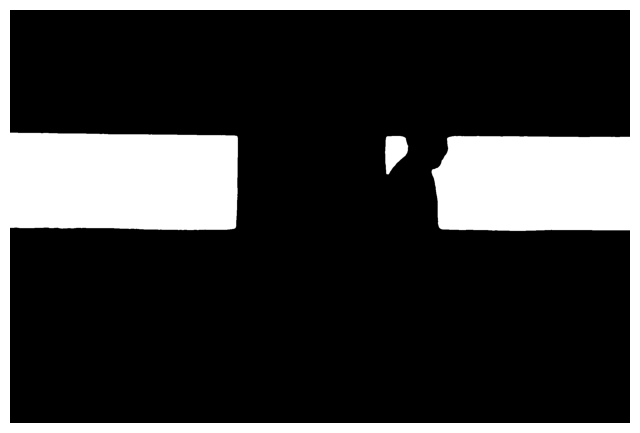

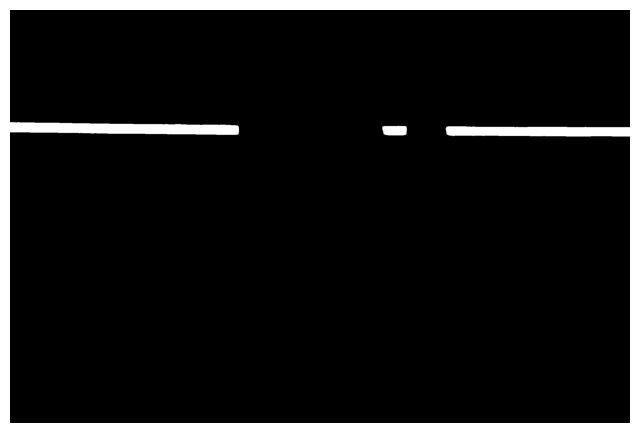

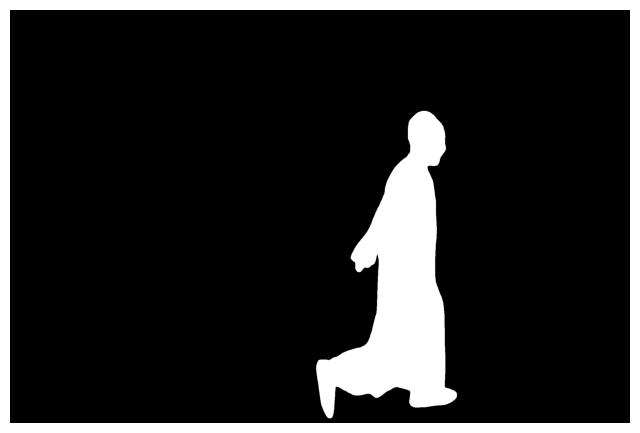

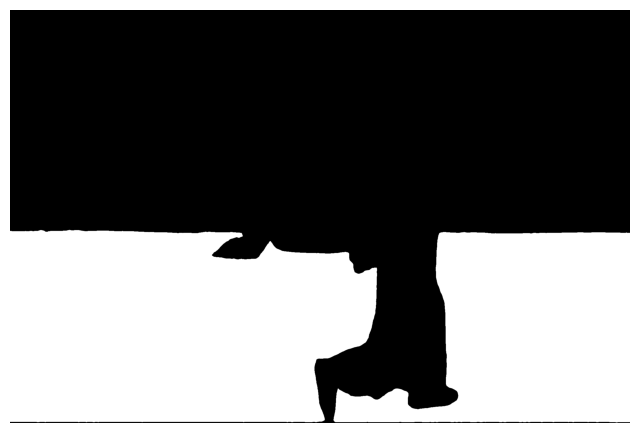

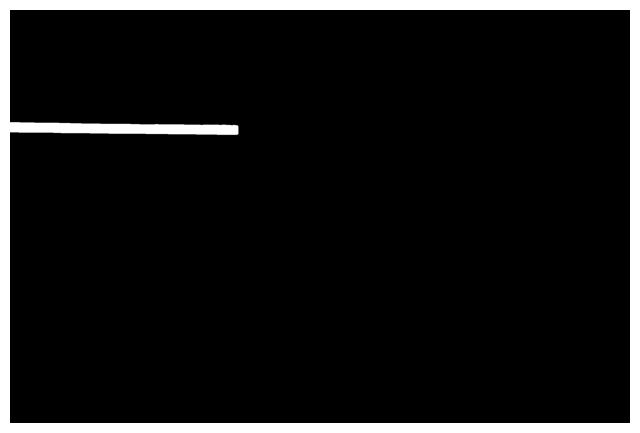

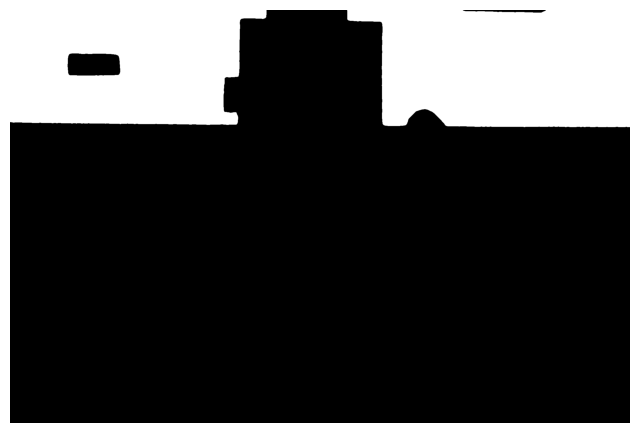

In [3]:
import os
import random
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask
from PIL import Image
import json

# Set the path to your dataset directory
dataset_directory = "SA1B"

# Create a list of image and mask file pairs
image_mask_pairs = []
for filename in os.listdir(dataset_directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(dataset_directory, filename)
        mask_filename = filename.replace(".jpg", ".json")
        mask_path = os.path.join(dataset_directory, mask_filename)
        if os.path.exists(mask_path):
            image_mask_pairs.append((image_path, mask_path))

# Choose a random pair from the list
random_pair = random.choice(image_mask_pairs)
image_path, mask_path = random_pair

# Load and display the image
image = Image.open(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Load and display the masks
with open(mask_path, 'r') as json_file:
    mask_data = json.load(json_file)

# Loop through each annotation to display each mask
for annotation in mask_data['annotations']:
    rle_mask = annotation['segmentation']
    binary_mask = coco_mask.decode(rle_mask)

    plt.figure(figsize=(8, 8))
    plt.imshow(binary_mask, cmap='gray')
    plt.axis('off')
    plt.show()


Image: sa_225595.jpg, Number of masks: 128


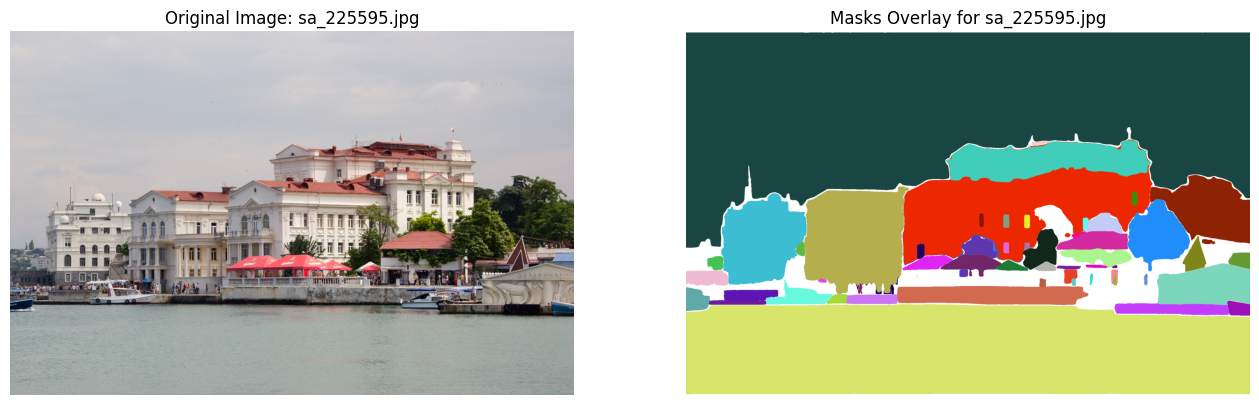

Image: sa_228799.jpg, Number of masks: 49


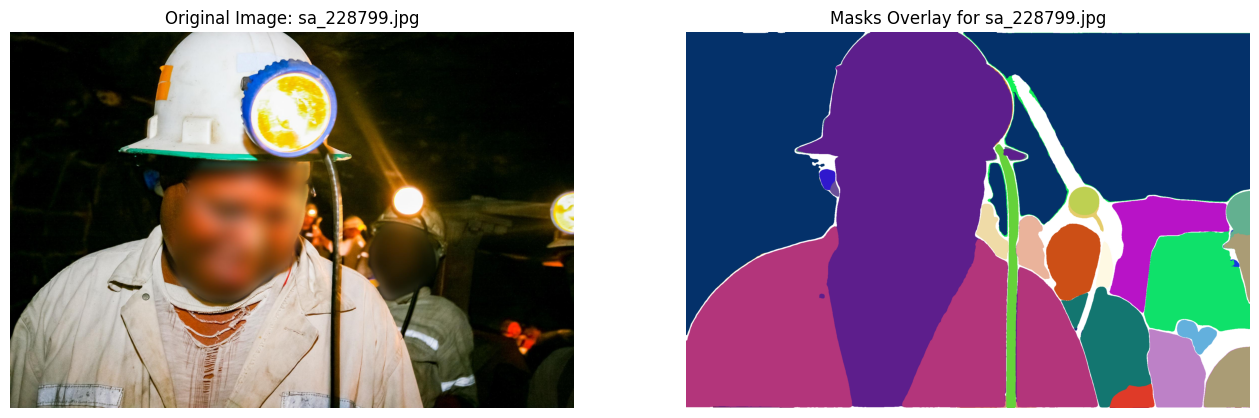

Image: sa_230341.jpg, Number of masks: 37


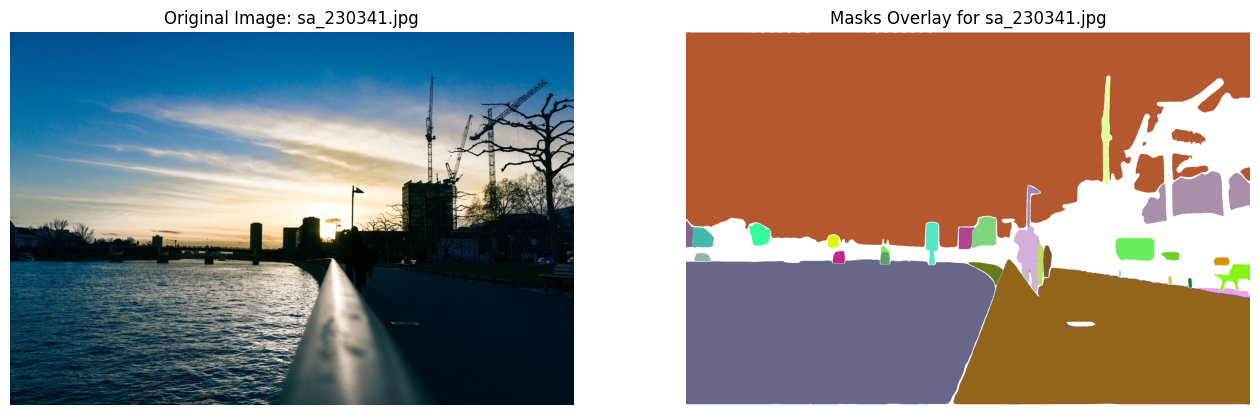

In [4]:
import os
import random
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask
from PIL import Image
import json
import numpy as np

def random_color():
    """Generate a random color."""
    return [random.randint(0, 255) for _ in range(3)]

def get_image_info(dataset_directory, num_images=3):
    """Get the names and number of masks of random images."""
    image_mask_pairs = []
    for filename in os.listdir(dataset_directory):
        if filename.endswith(".jpg"):
            image_path = os.path.join(dataset_directory, filename)
            mask_filename = filename.replace(".jpg", ".json")
            mask_path = os.path.join(dataset_directory, mask_filename)
            if os.path.exists(mask_path):
                image_mask_pairs.append((image_path, mask_path))

    selected_pairs = random.sample(image_mask_pairs, min(num_images, len(image_mask_pairs)))
    return [(os.path.basename(pair[0]), len(json.load(open(pair[1], 'r'))['annotations'])) for pair in selected_pairs]

# Set the path to your dataset directory
dataset_directory = "SA1B"

# Get image info for 3 random images
selected_images_info = get_image_info(dataset_directory, 3)

# Process and display each selected image and its masks
for image_name, mask_count in selected_images_info:
    print(f"Image: {image_name}, Number of masks: {mask_count}")

    image_path = os.path.join(dataset_directory, image_name)
    mask_filename = image_name.replace(".jpg", ".json")
    mask_path = os.path.join(dataset_directory, mask_filename)

    image = Image.open(image_path)
    image = np.array(image)

    mask_overlay = np.full_like(image, 255)

    with open(mask_path, 'r') as json_file:
        mask_data = json.load(json_file)

    for annotation in mask_data['annotations']:
        rle_mask = annotation['segmentation']
        binary_mask = coco_mask.decode(rle_mask)
        color = random_color()
        for i in range(3):
            mask_overlay[:, :, i] = np.where(binary_mask == 1, color[i], mask_overlay[:, :, i])

    # Display the original image and mask overlay
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'Original Image: {image_name}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask_overlay)
    plt.title(f'Masks Overlay for {image_name}')
    plt.axis('off')

    plt.show()


In [5]:
import os
import json
import numpy as np
from PIL import Image
from pycocotools import mask as coco_mask
import random
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset

class SA1BDataSet(Dataset):
    def __init__(self, dataset_directory, transform=None):
        """
        Initialize the dataset.
        Args:
            dataset_directory (string): Directory with all the images and annotations.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataset_directory = dataset_directory
        self.transform = transform
        self.ids = self._load_image_ids()

    def _load_image_ids(self):
        """Load all image ids."""
        ids = []
        for filename in os.listdir(self.dataset_directory):
            if filename.endswith(".jpg"):
                image_id = filename.replace(".jpg", "")
                mask_filename = filename.replace(".jpg", ".json")
                mask_path = os.path.join(self.dataset_directory, mask_filename)
                if os.path.exists(mask_path):
                    ids.append(image_id)
        return ids

    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (image, target) where target is a dictionary of masks.
        """
        image_id = self.ids[index]
        image_path = os.path.join(self.dataset_directory, image_id + ".jpg")
        mask_path = os.path.join(self.dataset_directory, image_id + ".json")

        image = Image.open(image_path).convert('RGB')
        target = self._load_target(mask_path)

        if self.transform is not None:
            image = self.transform(image)

        return image, target

    def _load_target(self, mask_path):
        """Load masks from the JSON file."""
        with open(mask_path, 'r') as file:
            mask_data = json.load(file)
        
        masks = [annotation['segmentation'] for annotation in mask_data['annotations']]
        target = {}
        target['masks'] = masks
        return target
    """Load masks from the JSON file."""
    with open(mask_path, 'r') as file:
        mask_data = json.load(file)
    
    # List to hold all mask arrays
    

    def show_image_and_all_masks(self, index):
        """Display the image and all its corresponding masks for a given index."""
        image, target = self[index]

        # Create a white background
        mask_overlay = np.full((image.height, image.width, 3), 255, np.uint8)

        for mask in target['masks']:
            binary_mask = coco_mask.decode(mask)
            color = self._random_color()
            for i in range(3):  # For each color channel
                mask_overlay[:, :, i] = np.where(binary_mask == 1, color[i], mask_overlay[:, :, i])

        # Display the original image and mask overlay
        plt.figure(figsize=(16, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title
        ('Original Image')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(mask_overlay)
        plt.title('Masks Overlay')
        plt.axis('off')

        plt.show()

    def _random_color(self):
        """
        Generate a random color.
        """
        return [random.randint(0, 255) for _ in range(3)]

    def __len__(self):
        return len(self.ids)



In [6]:
# Initialize the dataset
sa1b_dataset = SA1BDataSet(dataset_directory="SA1B")

# Print the number of items in the dataset
print("Total number of images in the dataset:", len(sa1b_dataset))


Total number of images in the dataset: 11186


Number of masks for the image: 295


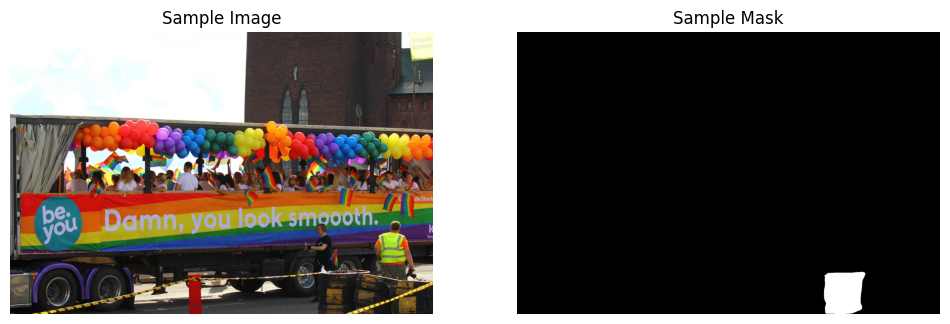

In [11]:
# Retrieve a single image-mask pair from the dataset
image, target = sa1b_dataset[0]

# Count the number of masks for the image
num_masks = len(target['masks'])
print(f"Number of masks for the image: {num_masks}")

# Display the image and the first mask (as an example)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Sample Image")
plt.axis("off")

# If there is at least one mask, display it
if num_masks > 0:
    plt.subplot(1, 2, 2)
    plt.imshow(coco_mask.decode(target['masks'][290]), cmap='gray')  # Showing the first mask
    plt.title("Sample Mask")
    plt.axis("off")

plt.show()


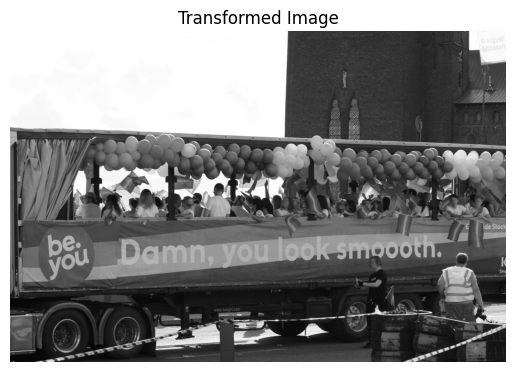

In [12]:
from torchvision import transforms

# Define a simple transformation: convert images to grayscale
simple_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
])

# Initialize the dataset with the transformation
transformed_dataset = SA1BDataSet(dataset_directory="SA1B", transform=simple_transform)

# Retrieve and display a transformed image
transformed_image, _ = transformed_dataset[0]
plt.imshow(transforms.ToPILImage()(transformed_image), cmap='gray')
plt.title("Transformed Image")
plt.axis("off")
plt.show()


In [ ]:
# Display images with all masks for the first three images
for i in range(10):
    sa1b_dataset.show_image_and_all_masks(i)
